In [2]:
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [3]:
def get_ms(timestamp):
    lines = re.split('\:|\.', timestamp)
    return datetime.timedelta(hours=int(lines[0]),minutes=int(lines[1]),seconds=int(lines[2]),milliseconds=int(lines[3]))

In [4]:
def is_time_stamp(timestamp):
    try:
        get_ms(timestamp)
        return True
    except ValueError:
        return False
    except IndexError:
        return False

In [5]:
t1_list = []
t2_list = []
diffs = []
for name in [f"last_{i}.txt" for i in range(1,4)]:
    with open(name, errors="ignore") as f:
        images = f.read().split("\n\n\n")
        for i in images:
            l = list(filter(is_time_stamp, i.split('\n')))
            if (len(l) < 2):
                print(i, "skipped due to not having time stamp")
                continue
                
            t1 = get_ms(l[0])
            t2 = get_ms(l[1])
            diff = (t2 - t1).total_seconds() * 1000
            
            if diff < 50:
                print(i, "skipped due to incorrect ocr")
                continue
            
            t1_list.append(t1)
            t2_list.append(t2)
            diffs.append(diff)


 skipped due to not having time stamp

mtODEatn丁
00:02:00.58?
Stopwatch
Stop
Split
00:02:00.703
+/-
Elapsed time
Comment
Stop
Split
00:01:02.515
Elapsed time
Comment
00:01:03.733
00:01:02.515
ALIENWARE
00:01:03.733
ida skipped due to incorrect ocr


In [6]:
d = {'t1': [str(i) for i in t1_list], 't2': [str(i) for i in t2_list], 'diff': diffs}

In [7]:
len(diffs)

109

In [8]:
df = pd.DataFrame(data=d)

In [9]:
df.to_csv("last_cam.csv")
df.to_excel("last_cam.xlsx")

In [10]:
df.head(n=20)

,t1,t2,diff
0,0:01:08.469000,0:01:08.644000,175.0
1,0:01:07.658000,0:01:07.832000,174.0
2,0:01:09.340000,0:01:09.515000,175.0
3,0:01:10.268000,0:01:10.442000,174.0
4,0:01:11.313000,0:01:11.487000,174.0
5,0:01:12.302000,0:01:12.477000,175.0
6,0:01:13.173000,0:01:13.289000,116.0
7,0:01:14.332000,0:01:14.448000,116.0
8,0:01:15.259000,0:01:15.432000,173.0
9,0:01:16.303000,0:01:16.478000,175.0


In [23]:
df_epiphan = pd.read_csv("epiphan.csv")
df_4k = pd.read_csv("uhd_4k.csv")
df_plus = pd.read_csv("hd60s_plus.csv")
df_last = pd.read_csv("last_cam.csv")


In [33]:
df_epiphan = df_epiphan.iloc[0:100]
df_4k = df_4k.iloc[0:100]
df_plus = df_plus.iloc[0:100]
df_last = df_last.iloc[0:100]

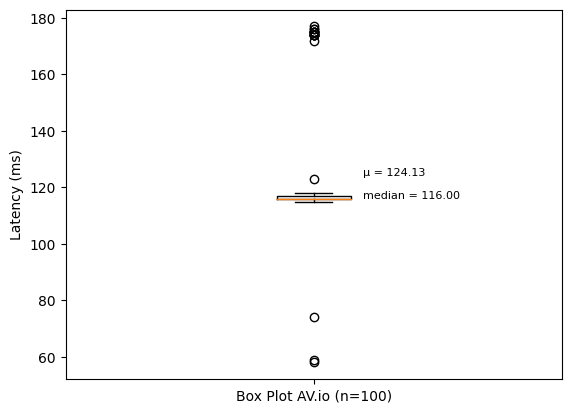

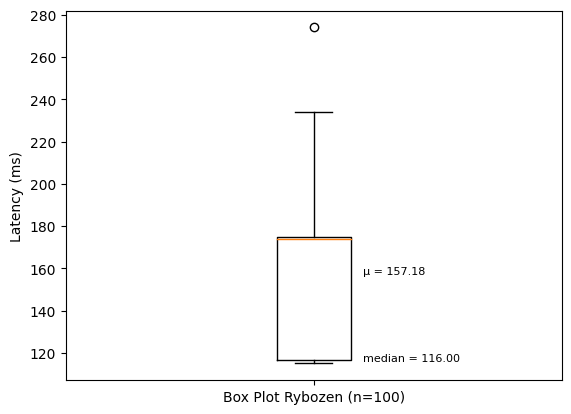

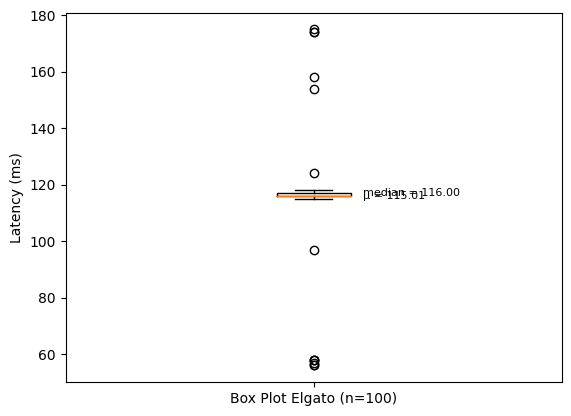

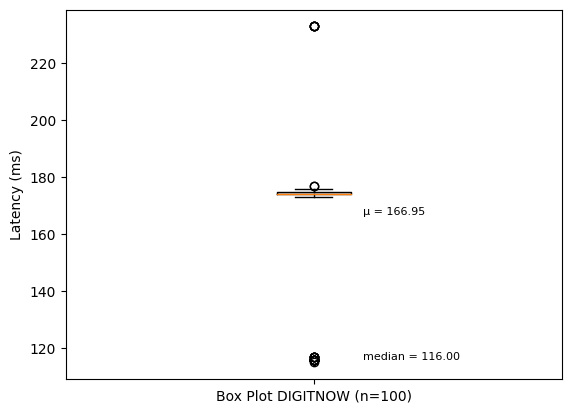

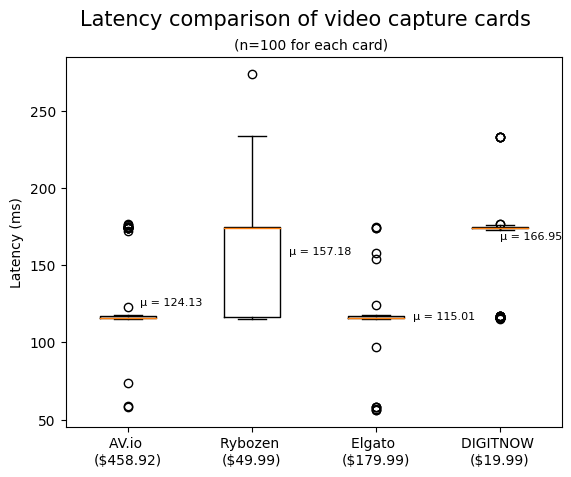

In [55]:
plt.boxplot([df_epiphan["diff"]])
plt.xticks([1], ["Box Plot AV.io (n=100)"])
plt.ylabel("Latency (ms)")
plt.text(1.1, df_epiphan['diff'].mean(), f"\u03BC = {df_epiphan['diff'].mean():0.2f}", fontsize=8)
plt.text(1.1, df_epiphan['diff'].median(), f"median = {df_epiphan['diff'].median():0.2f}", fontsize=8)
plt.show()

plt.boxplot([df_4k["diff"]])
plt.xticks([1], ["Box Plot Rybozen (n=100)"])
plt.ylabel("Latency (ms)")
plt.text(1.1, df_4k['diff'].mean(), f"\u03BC = {df_4k['diff'].mean():0.2f}", fontsize=8)
plt.text(1.1, df_epiphan['diff'].median(), f"median = {df_epiphan['diff'].median():0.2f}", fontsize=8)
plt.show()

plt.boxplot([df_plus["diff"]])
plt.xticks([1], ["Box Plot Elgato (n=100)"])
plt.ylabel("Latency (ms)")
plt.text(1.1, df_plus['diff'].mean(), f"\u03BC = {df_plus['diff'].mean():0.2f}", fontsize=8)
plt.text(1.1, df_epiphan['diff'].median(), f"median = {df_epiphan['diff'].median():0.2f}", fontsize=8)
plt.show()

plt.boxplot([df_last["diff"]])
plt.xticks([1], ["Box Plot DIGITNOW (n=100)"])
plt.ylabel("Latency (ms)")
plt.text(1.1, df_last['diff'].mean(), f"\u03BC = {df_last['diff'].mean():0.2f}", fontsize=8)
plt.text(1.1, df_epiphan['diff'].median(), f"median = {df_epiphan['diff'].median():0.2f}", fontsize=8) 
plt.show()

index = ['AV.io ','Rybozen ','Elgato ','DIGITNOW ']
plt.boxplot([df_epiphan["diff"],df_4k["diff"],df_plus["diff"],df_last["diff"]])
plt.xticks([1,2,3,4,],['AV.io \n($458.92)','Rybozen \n($49.99)','Elgato \n($179.99)','DIGITNOW \n($19.99)'])
plt.ylabel("Latency (ms)")
plt.text(1.1, df_epiphan['diff'].mean(), f"\u03BC = {df_epiphan['diff'].mean():0.2f}", fontsize=8)
plt.text(2.3, df_4k['diff'].mean(), f"\u03BC = {df_4k['diff'].mean():0.2f}", fontsize=8)
plt.text(3.3, df_plus['diff'].mean(), f"\u03BC = {df_plus['diff'].mean():0.2f}", fontsize=8)
plt.text(4.0, df_last['diff'].mean(), f"\u03BC = {df_last['diff'].mean():0.2f}", fontsize=8)
plt.title('(n=100 for each card) ', fontsize = 10)
plt.suptitle('Latency comparison of video capture cards', fontsize = 15)

plt.savefig('/Users/sanashah/Documents/SPIE/comparison.png')
plt.show()

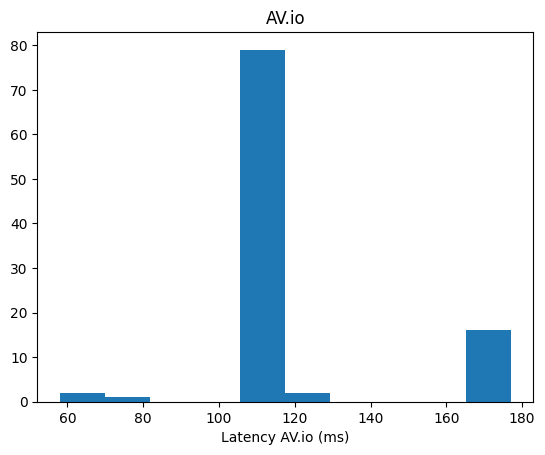

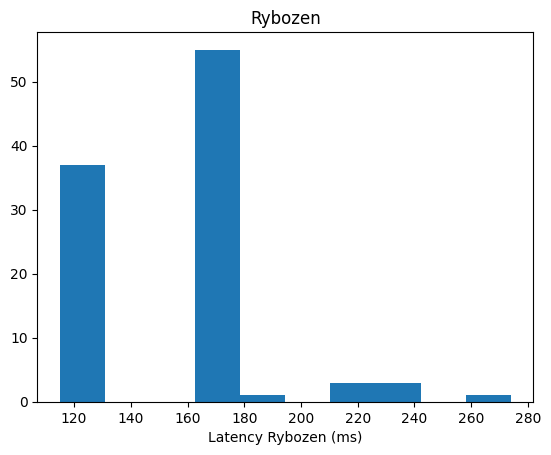

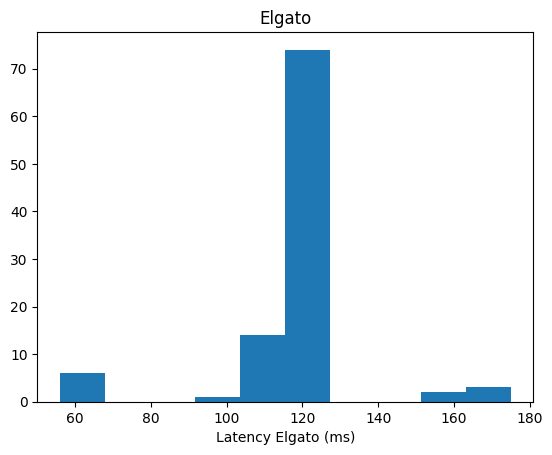

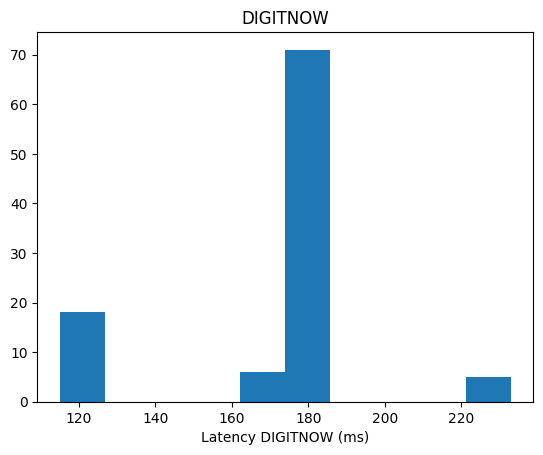

In [26]:
plt.hist(df_epiphan["diff"])
#plt.title(f"Epiphan {df_epiphan['diff'].mean()}")
plt.title(f"AV.io")
plt.xlabel("Latency AV.io (ms)")
plt.show()

plt.hist(df_4k["diff"])
#plt.title(f"4k {df_4k['diff'].mean()}")
plt.title(f"Rybozen")
plt.xlabel("Latency Rybozen (ms)")
plt.show()

plt.hist(df_plus["diff"])
#plt.title(f"df_plus {df_plus['diff'].mean()}")
plt.title(f"Elgato")
plt.xlabel("Latency Elgato (ms)")
plt.show()

plt.hist(df_last["diff"])
#plt.title(f"df_last {df_last['diff'].mean()}")
plt.title(f"DIGITNOW")
plt.xlabel("Latency DIGITNOW (ms)")
plt.show()

In [35]:
ttest_ind(df_epiphan["diff"], df_4k["diff"])

Ttest_indResult(statistic=-7.786288737690714, pvalue=3.771360216255582e-13)

In [28]:
ttest_ind(df_epiphan["diff"], df_plus["diff"])

Ttest_indResult(statistic=2.999107531896306, pvalue=0.003055169244646207)

In [29]:
ttest_ind(df_epiphan["diff"], df_last["diff"])

Ttest_indResult(statistic=-11.84057728722718, pvalue=8.375629663712501e-25)

In [30]:
ttest_ind(df_4k["diff"], df_plus["diff"])

Ttest_indResult(statistic=10.625338668438001, pvalue=3.715349153098226e-21)

In [31]:
ttest_ind(df_4k["diff"], df_last["diff"])

Ttest_indResult(statistic=-2.207799572167237, pvalue=0.028406482492359067)

In [32]:
ttest_ind(df_plus["diff"], df_last["diff"])

Ttest_indResult(statistic=-15.795553477129754, pvalue=6.600911251621242e-37)

In [43]:
print('AV.io std=', df_epiphan["diff"].std(), 'Rybozen std =', df_4k["diff"].std(), 'Elegato std =', df_plus["diff"].std(), 'DIGITNOW std =', df_last["diff"].std())

AV.io std= 23.992277798062315 Rybozen std = 35.015257857515245 Elegato std = 18.68370164262711 DIGITNOW std = 27.058998391281854
